<a href="https://colab.research.google.com/github/anbarasanhere/ML-Linear-Regression-Model/blob/main/ML_model_superstoredata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supermart Grocery Sales - Machine Learning Sales Predicting Project**


In [101]:
# step 1: Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
# step 2: Import Data set
data = pd.read_csv('/content/drive/MyDrive/[01]DataScience/Data sets/Python files/CSV files/ML dataset/Supermart Grocery Sales.csv')

In [66]:
# step 3 : Data Preprocessing
data.head()

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State,Unnamed: 11,Unnamed: 12
0,OD1,Harish,Oil & Masala,Masalas,Vellore,08/11/17,North,1254,0.12,401.28,Tamil Nadu,NaN,NaN
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,08/11/17,South,749,0.18,149.80,Tamil Nadu,NaN,NaN
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12/06/17,West,2360,0.21,165.20,Tamil Nadu,NaN,NaN
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11/10/16,South,896,0.25,89.60,Tamil Nadu,NaN,NaN
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11/10/16,South,2355,0.26,918.45,Tamil Nadu,NaN,NaN


In [67]:
#checking column & its types
data.columns

Index(['Order_ID', 'Customer_Name', 'Category', 'Sub_Category', 'City',
       'Order_Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [69]:
data.dtypes

,0
Order_ID,object
Customer_Name,object
Category,object
Sub_Category,object
City,object
Order_Date,object
Region,object
Sales,int64
Discount,float64
Profit,float64


In [70]:
# anlyse info about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9994 non-null   object 
 1   Customer_Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub_Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order_Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  Unnamed: 11    0 non-null      float64
 12  Unnamed: 12    0 non-null      float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1015.1+ KB


In [71]:
# checking missing values
data.isnull().sum()

,0
Order_ID,0
Customer_Name,0
Category,0
Sub_Category,0
City,0
Order_Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [72]:
# checking duplicates
data.duplicated().sum()

0

In [73]:
# drop duplicates if
data.dropna(how = 'all')

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State,Unnamed: 11,Unnamed: 12
0,OD1,Harish,Oil & Masala,Masalas,Vellore,08/11/17,North,1254,0.12,401.28,Tamil Nadu,NaN,NaN
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,08/11/17,South,749,0.18,149.80,Tamil Nadu,NaN,NaN
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12/06/17,West,2360,0.21,165.20,Tamil Nadu,NaN,NaN
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11/10/16,South,896,0.25,89.60,Tamil Nadu,NaN,NaN
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11/10/16,South,2355,0.26,918.45,Tamil Nadu,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24/12/15,West,945,0.16,359.10,Tamil Nadu,NaN,NaN
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,12/07/15,West,1195,0.26,71.70,Tamil Nadu,NaN,NaN
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06/06/17,West,1567,0.16,501.44,Tamil Nadu,NaN,NaN
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,16/10/18,West,1659,0.15,597.24,Tamil Nadu,NaN,NaN


In [75]:
data['Order_Date'] # DMY format

,Order_Date
0,08/11/17
1,08/11/17
2,12/06/17
3,11/10/16
4,11/10/16
...,...
9989,24/12/15
9990,12/07/15
9991,06/06/17
9992,16/10/18


In [76]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

<ipython-input-76-6a6ebeff9c0a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order_Date'] = pd.to_datetime(data['Order_Date'])


In [79]:
# Extracting Day, Month, Year from dataframe

data['Order_Day'] = data['Order_Date'].dt.day

data['Orde_Month'] = data['Order_Date'].dt.month

data['Order_Year'] = data['Order_Date'].dt.year

In [82]:
data.columns

Index(['Order_ID', 'Customer_Name', 'Category', 'Sub_Category', 'City',
       'Order_Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Unnamed: 11', 'Unnamed: 12', 'Order_Day', 'Orde_Month', 'Order_Year'],
      dtype='object')

In [94]:
data.rename(columns={'Orde_Month' : 'Order_Month'}, inplace=True)

In [95]:
data.dtypes

,0
Order_ID,object
Customer_Name,object
Category,object
Sub_Category,object
City,object
Order_Date,datetime64[ns]
Region,object
Sales,int64
Discount,float64
Profit,float64


In [89]:
cat_cols = ['Category', 'Sub_Category', 'City' 'Region', 'State','Order_Month']

In [90]:
# converting categorical variables into numerical variables

In [91]:
# Initialize the label encoder()
le = LabelEncoder()

In [98]:
# convert categorical columns into numerical with fit_transform

data['Category']= le.fit_transform(data['Category'])
data['Sub_Category']= le.fit_transform(data['Sub_Category'])
data['City']= le.fit_transform(data['City'])
data['Region']= le.fit_transform(data['Region'])
data['State']= le.fit_transform(data['State'])
data['Order_Month']= le.fit_transform(data['Order_Month'])

In [99]:
data.head()

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State,Order_Day,Order_Month,Order_Year
0,OD1,Harish,5,14,21,2017-08-11,2,1254,0.12,401.28,0,11,7,2017
1,OD2,Sudha,1,13,8,2017-08-11,3,749,0.18,149.80,0,11,7,2017
2,OD3,Hussain,3,0,13,2017-12-06,4,2360,0.21,165.20,0,6,11,2017
3,OD4,Jackson,4,12,4,2016-11-10,3,896,0.25,89.60,0,10,10,2016
4,OD5,Ridhesh,3,18,12,2016-11-10,3,2355,0.26,918.45,0,10,10,2016


In [102]:
data.sample(5)

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State,Order_Day,Order_Month,Order_Year
7720,OD7721,Mathew,0,3,9,2017-07-21,4,1726,0.32,258.90,0,21,6,2017
496,OD497,Komal,3,0,7,2017-07-25,4,1398,0.26,545.22,0,25,6,2017
1905,OD1906,Hussain,3,20,2,2017-11-26,4,2063,0.31,928.35,0,26,10,2017
4755,OD4756,Sharon,0,1,10,2015-11-25,4,1332,0.23,266.40,0,25,10,2015
2004,OD2005,Vince,5,8,9,2016-11-12,0,781,0.16,218.68,0,12,10,2016


In [ ]:
#Step 4: Exploratory Data Analysis**

In [ ]:
# Distribution of Sales by Category (Box-Plot)

<ipython-input-109-730094065e8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Category' , y='Sales' , data=data, palette='Set3')


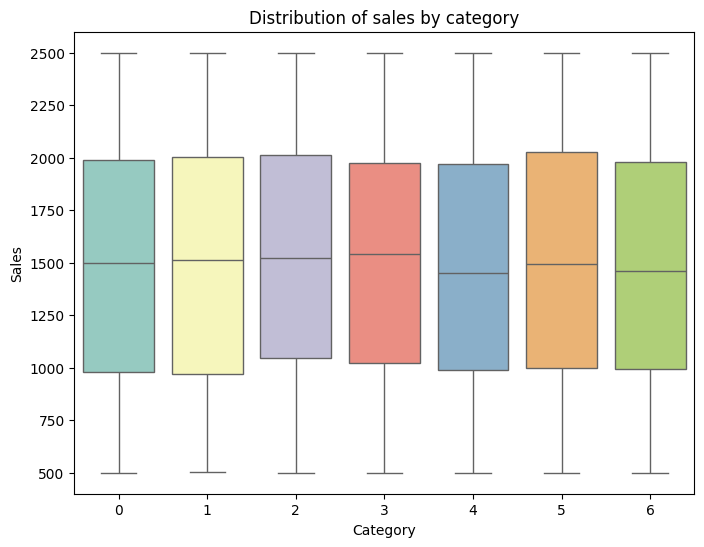

In [109]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'Category' , y='Sales' , data=data, palette='Set3')
plt.title('Distribution of sales by category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

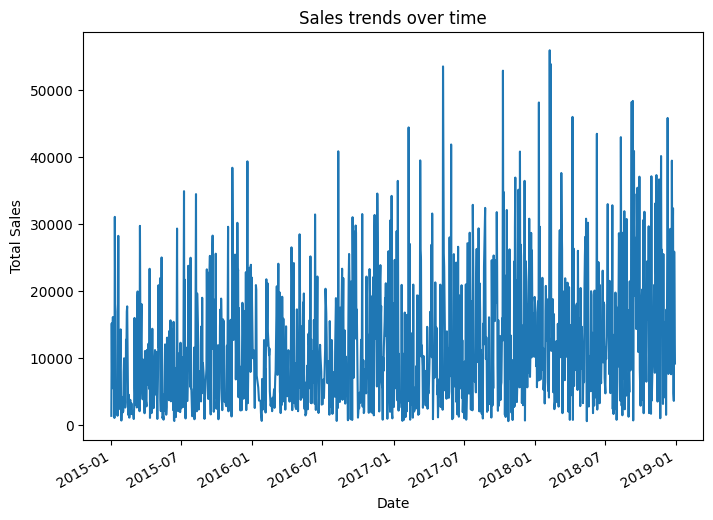

In [122]:
# Sales trends over time
plt.figure(figsize=(8,6))
data.groupby('Order_Date')['Sales'].sum().plot()
plt.title('Sales trends over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [116]:
# # correlation Heat Map
# plt.figure(figsize=(10,8))
# corr_matrix = data.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('correlation heat map')
# plt.show()

In [118]:
data.columns

Index(['Order_ID', 'Customer_Name', 'Category', 'Sub_Category', 'City',
       'Order_Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order_Day', 'Order_Month', 'Order_Year'],
      dtype='object')

In [124]:
# Feature Selection & Model Building
features = data.drop(columns=['Order_ID', 'Customer_Name', 'Order_Date', 'Sales', 'Order_Month'])
target = data['Sales']

In [127]:
# Split the data into testing and training

x_test, x_train, y_test, y_train = train_test_split(features, target, test_size=0.2 , random_state= 42)

In [130]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [131]:
# Step 6 : train a linear regression model
# Initialize the model
model = LinearRegression()

In [132]:
# Train the model

model.fit(x_train, y_train)

# make predictions

y_pred = model.predict(x_test)

In [133]:
# Step 7 : Evaluate the Model
# calculate MSE and R-Squared
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 212915.81575305032
R-Squared: 0.3634267023698483


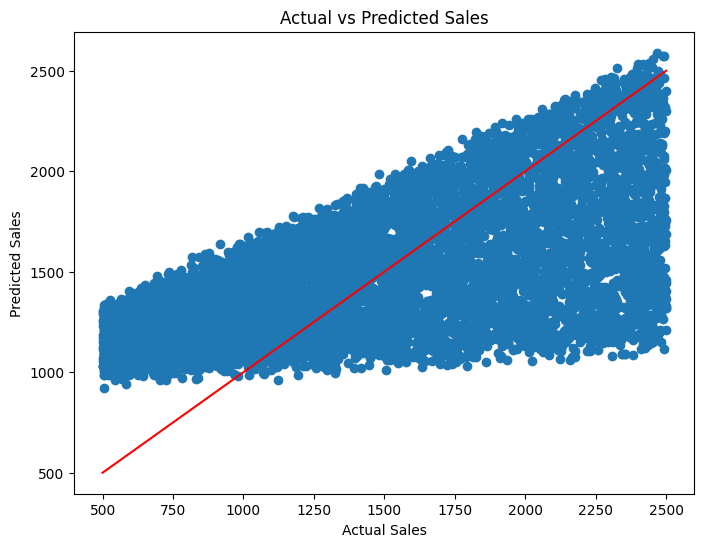

In [134]:
# Step 8: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [ ]:
# Step 9: Conclusion

The linear regression model provided a reasonable prediction for sales based on the features selected.

The model’s R-squared value indicates a good fit, explaining a significant portion of the variance in sales.

Further refinement of the model could involve trying different machine learning algorithms, such as decision trees or ensemble methods.